In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import classification_report
%matplotlib inline
RANDOM_STATE = 42

In [2]:
data=pd.read_csv("weather.csv")
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [3]:
data.RainToday[data.RainToday == 'No'] = 0

data.RainToday[data.RainToday == 'Yes'] = 1

data.RainTomorrow[data.RainTomorrow == 'No'] = 0

data.RainTomorrow[data.RainTomorrow == 'Yes'] = 1

data = data.dropna()
print(data)

     MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3          NW   
1       14.0     26.9       3.6          4.4       9.7         ENE   
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
4        7.6     16.1       2.8          5.6      10.6         SSE   
..       ...      ...       ...          ...       ...         ...   
361      9.0     30.7       0.0          7.6      12.1         NNW   
362      7.1     28.4       0.0         11.6      12.7           N   
363     12.5     19.9       0.0          8.4       5.3         ESE   
364     12.5     26.9       0.0          5.0       7.1          NW   
365     12.3     30.2       0.0          6.0      12.6          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0             30.0         SW         NW           6.0  ...           29   
1      

<ipython-input-3-91dd0fbeed20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.RainToday[data.RainToday == 'No'] = 0
<ipython-input-3-91dd0fbeed20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.RainToday[data.RainToday == 'Yes'] = 1
<ipython-input-3-91dd0fbeed20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.RainTomorrow[data.RainTomorrow == 'No'] = 0
<ipython-input-3-91dd0fbeed20>:7: SettingWithCopyWarning: 
A va

In [4]:

x= data.drop(columns = ['WindGustDir','WindDir9am', 'WindDir3pm'])
y = data['RainTomorrow']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=RANDOM_STATE)
print(y_train.shape)
print(y_test.shape)
print(x_train.shape)

(246,)
(82,)
(246, 19)


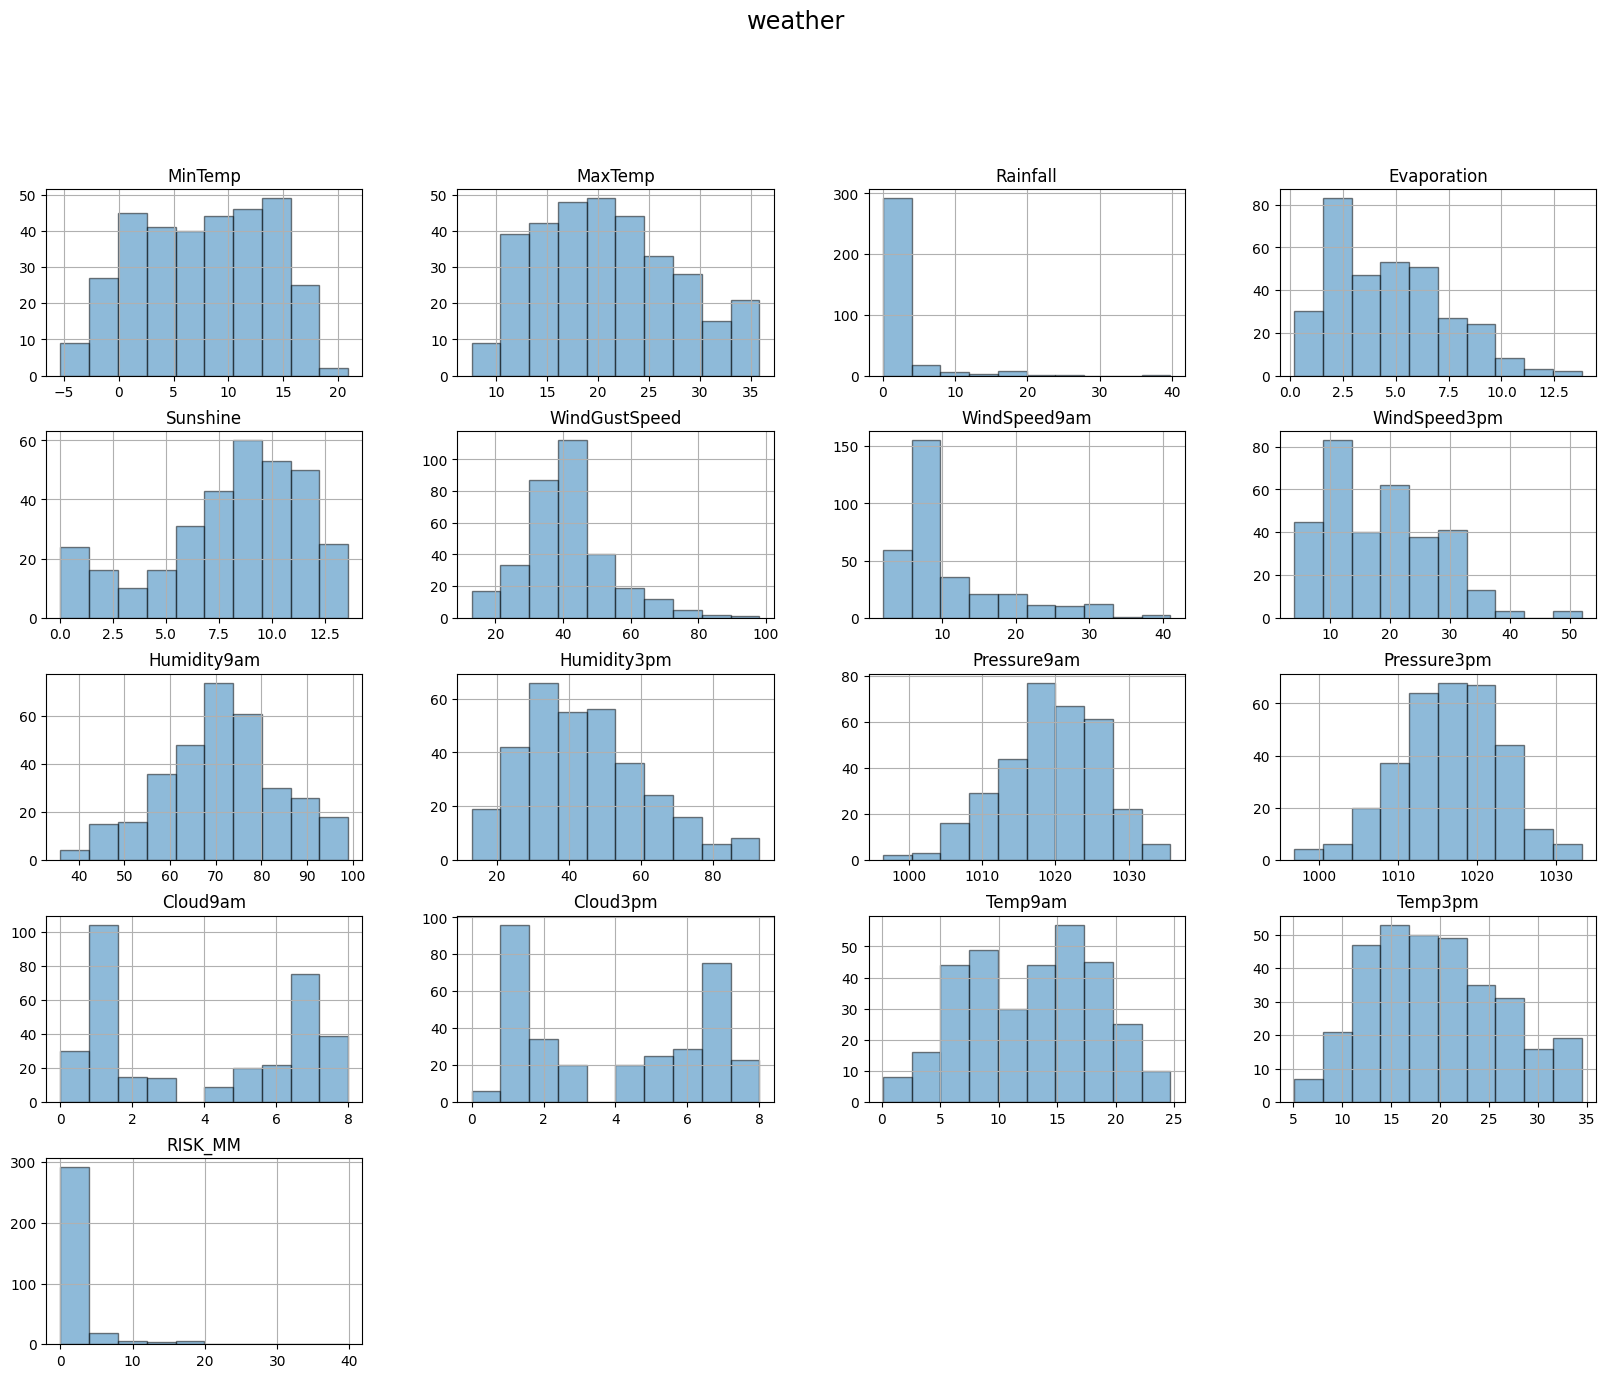

In [5]:
data.hist(alpha=.5, rwidth=1, ec='black', figsize=(20,15));
plt.suptitle('weather', x=0.5, y=1, fontsize='xx-large');
plt.ticklabel_format(style='plain', useOffset=True)

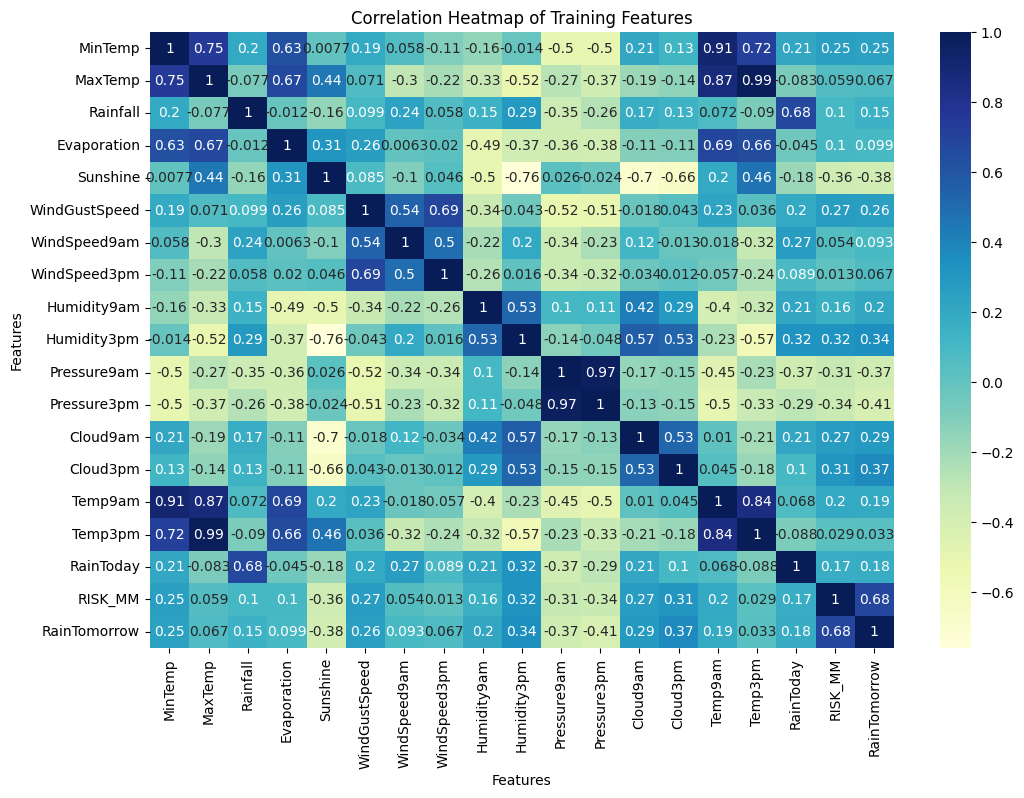

In [6]:


# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(x.corr(), annot=True, cmap="YlGnBu")

# Set axis labels and title
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Heatmap of Training Features")

# Show the plot
plt.show()

In [8]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.975609756097561


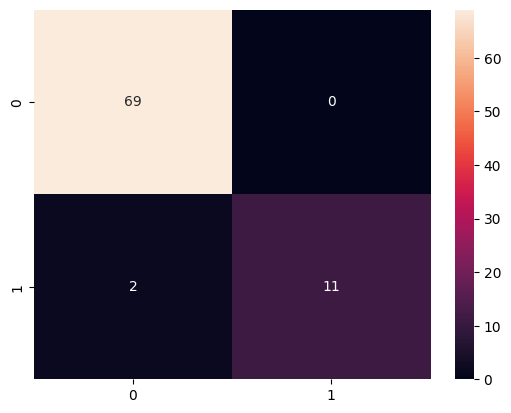

[[69  2]
 [ 0 11]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       0.85      1.00      0.92        11

    accuracy                           0.98        82
   macro avg       0.92      0.99      0.95        82
weighted avg       0.98      0.98      0.98        82



In [9]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
y_p=model.predict(x_test)
print(accuracy_score(y_p,y_test))
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_p)
sns.heatmap(cm, annot=True)
plt.show()
print(confusion_matrix(y_p,y_test))

print(classification_report(y_p,y_test))

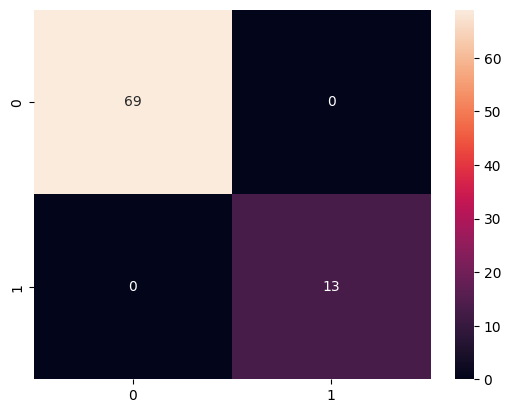

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       0.85      1.00      0.92        11

    accuracy                           0.98        82
   macro avg       0.92      0.99      0.95        82
weighted avg       0.98      0.98      0.98        82



In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit (x_train, y_train)

y_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_predict2)
test_accuracy

y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy

cm = confusion_matrix(y_test, y_predict2)
sns.heatmap(cm, annot=True)
plt.show()
print(classification_report(y_p,y_test))


The mean accuracy of this KNN classifier is: 0.8292682926829268


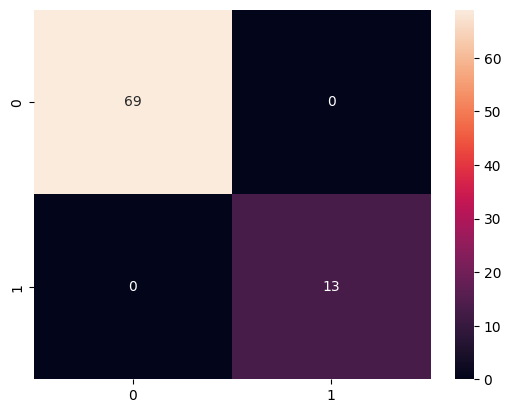

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       0.85      1.00      0.92        11

    accuracy                           0.98        82
   macro avg       0.92      0.99      0.95        82
weighted avg       0.98      0.98      0.98        82



In [11]:
#KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
def knn_model_fitting(x_train, x_test, y_train, y_test, n_neighbors):

    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train)

    preds = knn.predict(x_test)
    score = knn.score(x_test, y_test)
    print('The mean accuracy of this KNN classifier is: {}'.format(score))

    return preds, knn
# here just set the # of neighbors =1 to see the model performance
n_neighbors= 1
preds_default, knn_default = knn_model_fitting(x_train, x_test, y_train, y_test, n_neighbors)

cm = confusion_matrix(y_test, y_predict2)
sns.heatmap(cm, annot=True)
plt.show()
print(classification_report(y_p,y_test))

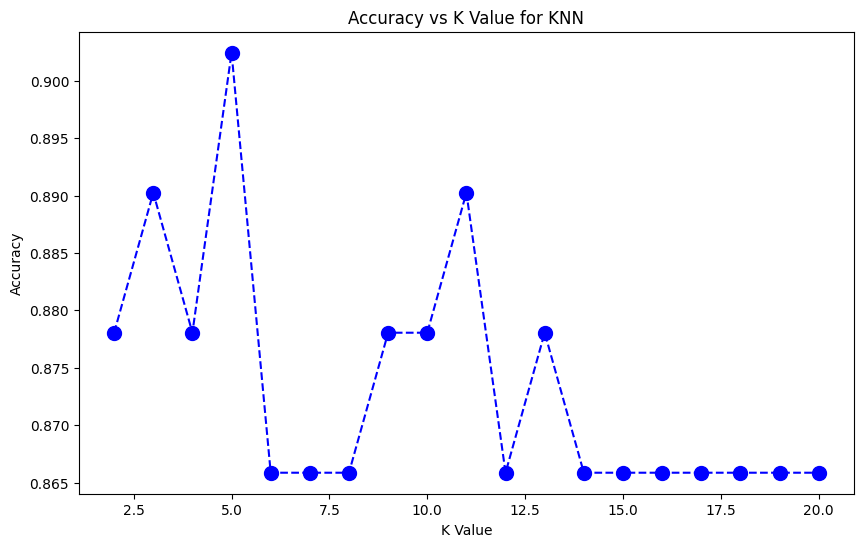

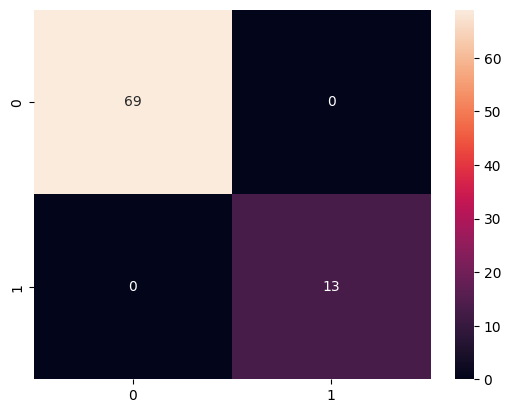

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       0.85      1.00      0.92        11

    accuracy                           0.98        82
   macro avg       0.92      0.99      0.95        82
weighted avg       0.98      0.98      0.98        82



In [12]:


# Define a list to store the accuracies for different K values
accuracies = []

# Loop through different K values from 2 to 20
for k in range(2, 21):
    # Initialize and fit the KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = knn.predict(x_test)

    # Calculate the accuracy for the current K value
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy to the list
    accuracies.append(accuracy)

# Plot the accuracy vs K graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), accuracies, color="blue", linestyle="--", marker="o", markersize=10)

# Set labels and title
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value for KNN")

# Display the plot
plt.show()

cm = confusion_matrix(y_test, y_predict2)
sns.heatmap(cm, annot=True)
plt.show()
print(classification_report(y_p,y_test))

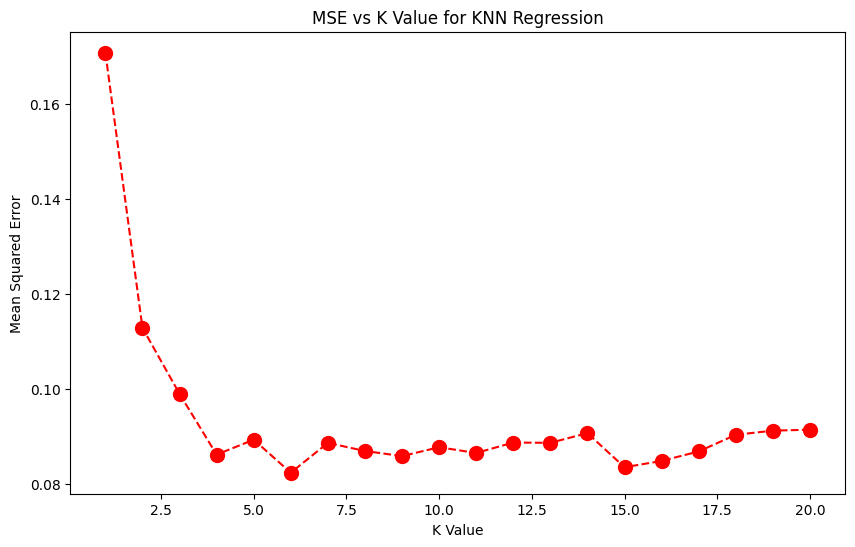

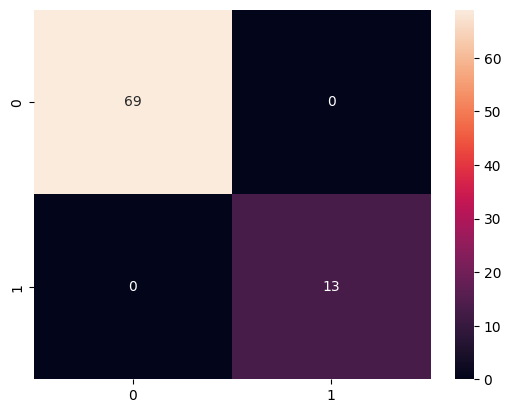

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       0.85      1.00      0.92        11

    accuracy                           0.98        82
   macro avg       0.92      0.99      0.95        82
weighted avg       0.98      0.98      0.98        82



In [15]:
from sklearn.neighbors import KNeighborsRegressor
# Define a list to store the MSE values for different K values
mse_values = []

# Loop through different K values from 1 to 20
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Predict target values for the test data
    y_pred = knn.predict(x_test)

    # Calculate the mean squared error for the current K value
    mse = mean_squared_error(y_test, y_pred)

    # Append the MSE to the list
    mse_values.append(mse)

# Plot the MSE vs K graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), mse_values, color="red", linestyle="--", marker="o", markersize=10)

# Set labels and title
plt.xlabel("K Value")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs K Value for KNN Regression")

# Display the plot
plt.show()

cm = confusion_matrix(y_test, y_predict2)
sns.heatmap(cm, annot=True)
plt.show()
print(classification_report(y_p,y_test))

In [ ]:


# Define a list to store the accuracies for different K values
accuracies = []

# Loop through different K values from 2 to 20
for k in range(2, 21):
    # Initialize and fit the KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = knn.predict(x_test)

    # Calculate the accuracy for the current K value
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy to the list
    accuracies.append(accuracy)

# Plot the accuracy vs K graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), accuracies, color="blue", linestyle="--", marker="o", markersize=10)

# Set labels and title
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value for KNN")

# Display the plot
plt.show()

cm = confusion_matrix(y_test, y_predict2)
sns.heatmap(cm, annot=True)
plt.show()
print(classification_report(y_p,y_test))

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_predict)
test_accuracy

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
plt.show()
print(classification_report(y_predict,y_test))

In [24]:
x_train = x_train.astype('int')
x_test = x_test.astype('int')
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
xgb_clr = XGBClassifier(enable_categorical=True)
xgb_clr.fit(x_train,y_train)
y_pred_xgb = xgb_clr.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred_xgb))

accuracy: 1.0


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.7/841.7 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for metrics: filename=metrics-0.3.3-py2.py3-none-any.whl size=17794 sha256=7a97e13b533dd9c31ba8c308ce63e2176f6ff9a5858bbf727da023a5f790fdb4
  Stored in directory: /root/.cache/pip/wheels/29/7a/e7/1175d9ff10607b8f02aa37c32392cb28cdda0aea8fcc2b514b
  Created wheel for pathspec: filename=pathspec-0.5.5-py3-none-any.whl size=24218 sha256=f15f5ff065628627d7e5d71a3b3b1fd9e0edc9be5edf953e23d35c5f9bb8891a
  Stored in directory: /root/.cache/pip/wheels/28/d4/11/01ccd690e97b06874998aa554a8b2610c361900d2a7e038300
Successfully built metrics pathspec
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.16.1
    Uninstalling Pygments-2.16.1:
      Successfully uninstalled Pygments-2.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This b

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        13

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



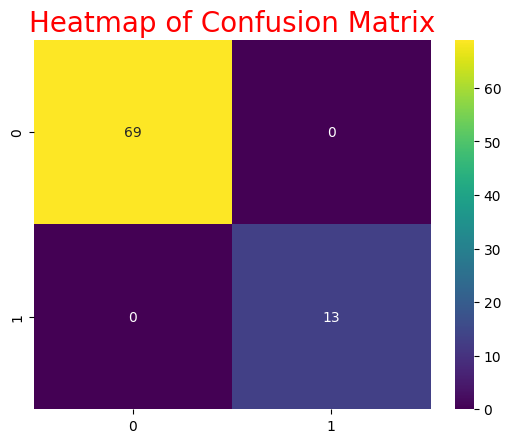

In [26]:
!pip install metrics
import metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_xgb))
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions for the test set
y_pred_xgb = xgb_clr.predict(x_test)

# Generate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix as a heatmap
plt.title('Heatmap of Confusion Matrix', fontsize = 20,c='r')
sns.heatmap(confusion_matrix, annot = True,cmap='viridis')
plt.show()
